Samuel Castro TELECOM PROJECT DSC 680-T302 10/22/23

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data from txt file
file_path = 'Desktop/DSC 680/Telecom.csv' 
df = pd.read_csv(file_path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning

In [4]:
# Replacing 'No phone service' with 'No' in MultipleLines column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [5]:
# Converting TotalCharges column to numeric, errors='coerce' will replace invalid parsing with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Dropping rows with NaN values in TotalCharges column
df = df.dropna()

In [6]:
# Converting SeniorCitizen column to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling', 'Churn']

df[categorical_cols] = df[categorical_cols].astype('category')

In [9]:
# Define bins and labels for tenure categories
tenure_bins = [0, 12, 24, 48, np.inf]
tenure_labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4+ Years']
df['tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

In [12]:
x = df.columns.tolist()
print(x)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [13]:
# Removing Columns unrelated to Telecom Services
df = df.drop(columns=['PaymentMethod'])

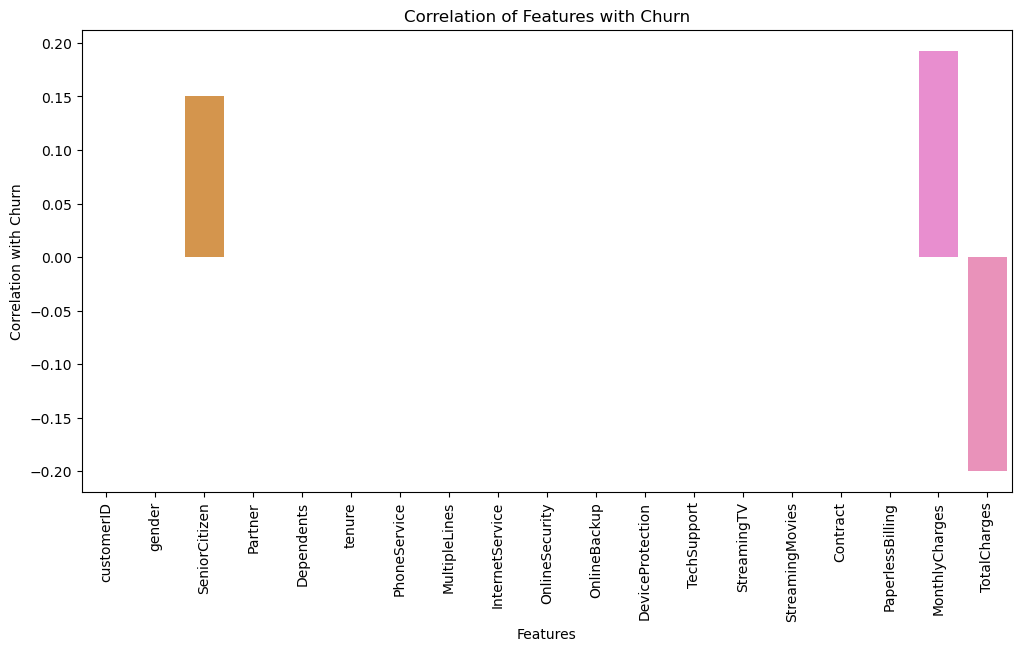

In [21]:
import numpy as np

# Convert non-numeric columns to numeric, filling non-convertible values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with a specific number (for example, 0)
df_numeric = df_numeric.fillna(0)

# Calculate correlation of features with 'Churn'
churn_correlation = df_numeric.drop(columns=['Churn']).apply(lambda x: x.corr(df_numeric['Churn']))

# Create a DataFrame for correlation values
correlation_with_churn = pd.DataFrame(churn_correlation, columns=['Correlation'])

# Plot correlation with 'Churn'
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn['Correlation'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.show()

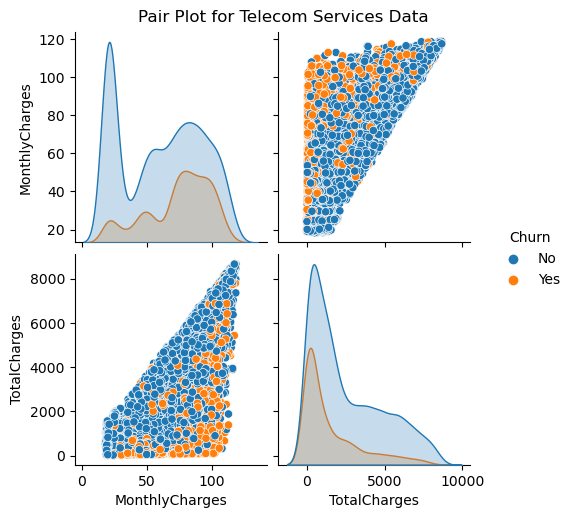

In [16]:
# Plot pair plot for selected columns
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pair Plot for Telecom Services Data', y=1.02)
plt.show()

Feature Importance

In [28]:
# Remove non-numeric columns (like customerID) from features
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

In [36]:
# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X, columns=['gender','tenure', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'])

In [37]:
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

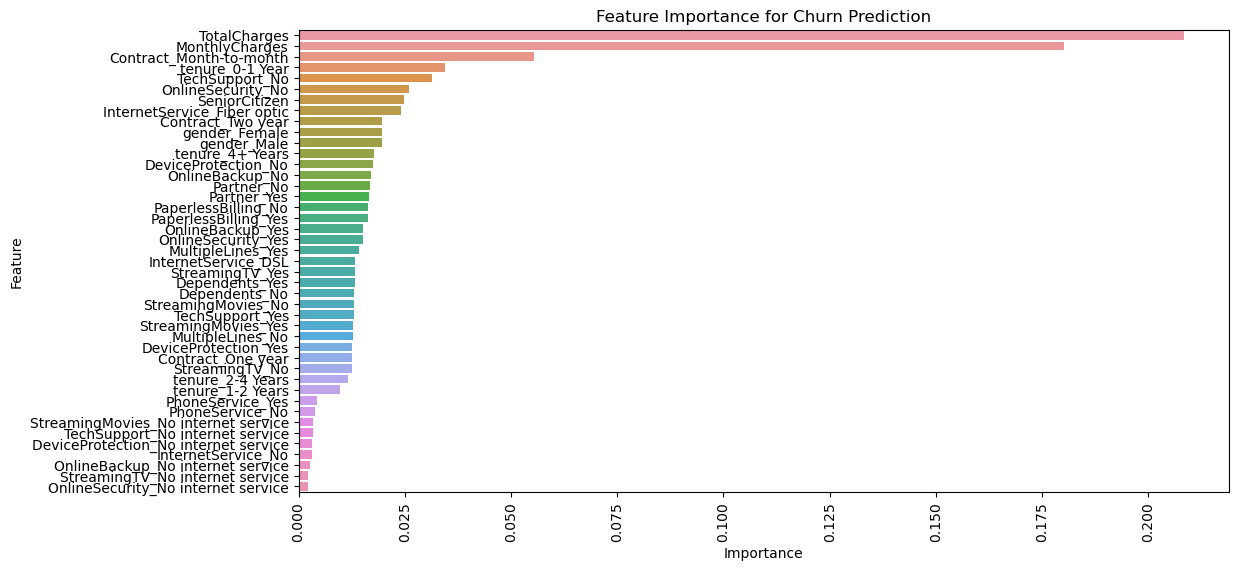

In [42]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Churn Prediction')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.78
Confusion Matrix:
[[939  94]
 [211 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [52]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_log_error

# Predict probabilities using the trained logistic regression model
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1 (churn)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming n_features = number of features used in the model)
n = len(X_test)  # number of samples
p = len(X_test.columns)  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

Mean Absolute Error: 0.21677327647476902
R-squared: -0.11076455575629862
Adjusted R-squared: -0.14580701789681272
Mean Squared Logarithmic Error: 0.10414937401922632
